# Import Packages

In [45]:
# built-in
import os

# third-party (pip install required)
from adjustText import adjust_text
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from pymodulon.io import load_json_model
from pymodulon.plotting import plot_gene_weights

# set matplotlib params
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['text.color'] = 'black'
matplotlib.rcParams['axes.labelcolor'] = 'black'
matplotlib.rcParams['xtick.color'] = 'black'
matplotlib.rcParams['ytick.color'] = 'black'
matplotlib.rcParams['font.sans-serif'] = "Arial"
matplotlib.rcParams['font.family'] = "sans-serif"

# Load Data

In [2]:
P1K_PATH = '../../data/precise1k/'
FIG_PATH = 'characterize_ytfs_figs/'

In [18]:
p1k = load_json_model(os.path.join(P1K_PATH, 'precise1k.json.gz'))
p1k_log_tpm = pd.read_csv(os.path.join(P1K_PATH, 'log_tpm_qc.csv'), index_col=0)

# YgeV

## Gene Weights

In [5]:
p1k.view_imodulon('YgeV')

,gene_weight,gene_name,synonyms,gene_product,COG,regulator,uniprot,start,end,strand,...,y_ome,k_eff,schmidt_prot_med,heckmann_prot_med,proteomics,p1k,p1k_ctrl_log_tpm,p1k_median_log_tpm,p1k_mad_log_tpm,in_iM
b2866,0.099117,xdhA,xdhA;ygeS,putative xanthine dehydrogenase molybdenum-bin...,Nucleotide transport and metabolism,"RpoN,Fnr,Nac",Q46799,3000345,3002603,+,...,True,False,NaN,NaN,False,True,2.672912,2.608625,0.829415,True
b2867,0.096048,xdhB,xdhB;ygeT,putative xanthine dehydrogenase FAD-binding su...,Nucleotide transport and metabolism,"RpoN,Fnr",Q46800,3002614,3003492,+,...,True,False,NaN,NaN,False,True,2.498976,2.442480,0.816733,True
b2870,0.239951,ygeW,ygeW,putative carbamoyltransferase YgeW,Nucleotide transport and metabolism,Crp,Q46803,3006262,3007452,+,...,True,False,NaN,NaN,False,True,0.735988,0.764934,0.490733,True
b2871,0.220418,ygeX,ygeX,2%2C3-diaminopropionate ammonia-lyase,Amino acid transport and metabolism,NaN,P66899,3007510,3008706,+,...,False,False,NaN,NaN,False,True,1.146471,1.115035,0.493360,True
b2872,0.185833,ygeY,ygeY,putative peptidase YgeY,Amino acid transport and metabolism,NaN,P65807,3008764,3009975,+,...,True,False,NaN,NaN,False,True,2.162683,2.102916,0.516082,True
b2873,0.124216,hyuA,hyuA;ygeZ,phenylhydantoinase,Nucleotide transport and metabolism,NaN,Q46806,3010028,3011413,+,...,False,False,NaN,NaN,False,True,1.629281,1.449349,0.406363,True
b2878,0.194455,ygfK,ygfK,putative oxidoreductase%2C Fe-S subunit,Energy production and conversion,RpoN,Q46811,3016060,3019158,+,...,True,False,NaN,NaN,False,True,1.347403,1.174737,0.368711,True
b2879,0.182902,ssnA,ssnA;ygfL,putative aminohydrolase,Nucleotide transport and metabolism,"RpoD,RpoN",Q46812,3019161,3020489,+,...,True,False,NaN,NaN,False,True,1.177379,1.009264,0.416184,True
b2880,0.156040,ygfM,ygfM,putative oxidoreductase,Energy production and conversion,NaN,P64557,3020540,3021319,+,...,True,False,NaN,NaN,False,True,2.138796,1.735516,0.493128,True
b2881,0.130451,xdhD,xdhD;ygfN,fused putative xanthine/hypoxanthine oxidase: ...,Nucleotide transport and metabolism,NaN,Q46814,3021316,3024186,+,...,True,False,NaN,NaN,False,True,2.376449,2.570864,0.433291,True


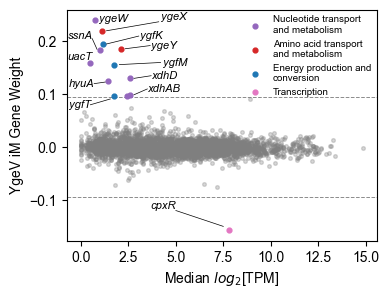

In [150]:
_, ax = plt.subplots(figsize=(4, 3))

colors = []
gene_weights = []

cog_to_col = {
    'Amino acid transport and metabolism': 'tab:red',
    'Energy production and conversion': 'tab:blue',
    'Nucleotide transport and metabolism': 'tab:purple',
    'Transcription': 'tab:pink'
}

im_m_bin = p1k.M_binarized['YgeV']

genes_in = list(im_m_bin[im_m_bin == 1].index)
genes_out = list(im_m_bin[im_m_bin == 0].index)

ax.scatter(p1k_log_tpm.median(axis=1).loc[genes_out], p1k.M['YgeV'].loc[genes_out], c='tab:gray', alpha=0.3, s=7)

def split_cog(cog):
    split_cog = ''
    line_len = 0
    for word in cog.split():
        if len(split_cog) == 0:
            split_cog = word
            line_len = len(word)
        elif line_len + len(word) < 20:
            split_cog = f'{split_cog} {word}'
            line_len += len(word)
        else:
            split_cog = f'{split_cog}\n{word}'
            line_len = len(word)
            
    return split_cog

xy_gene = []
cogs_seen = []
for gene_in in genes_in:
    x, y = p1k_log_tpm.median(axis=1).loc[gene_in], p1k.M['YgeV'].loc[gene_in]
    cog = p1k.gene_table.loc[gene_in, 'COG']
    if cog in cogs_seen:
        ax.scatter(x, y, c=cog_to_col[cog], s=12)
    else:
        ax.scatter(x, y, c=cog_to_col[cog], s=12, label=split_cog(cog))
        cogs_seen.append(cog)
    xy_gene.append(((x, y), p1k.gene_table.loc[gene_in, 'gene_name']))
    
ax.legend(fontsize=7, framealpha=0, bbox_to_anchor=(1.01, 0.8), loc='right')
    
ax.set_xlabel('Median $log_{2}$[TPM]', fontsize=10)
ax.set_ylabel('YgeV iM Gene Weight', fontsize=10)

ax.axhline(p1k.thresholds['YgeV'], linestyle='--', color='tab:gray', linewidth=0.7, alpha=0.9, zorder=-1)
ax.axhline(-p1k.thresholds['YgeV'], linestyle='--', color='tab:gray', linewidth=0.7, alpha=0.9, zorder=-1)
    
# manual labeling is better honestly
ax.plot((2.8, 3.5), (0.099, 0.11), linewidth=0.5, color='k')
ax.text(3.5, 0.11, 'xdhAB', ha='left', va='center', fontsize=8, fontstyle='italic', font='arial')

ax.plot((5, 7.5), (-0.12, -0.15), linewidth=0.5, color='k')
ax.text(5, -0.12, 'cpxR', ha='right', va='bottom', fontsize=8, fontstyle='italic', font='arial')

ax.plot((0.5, 1.55), (0.08, 0.091), linewidth=0.5, color='k')
ax.text(0.5, 0.08, 'ygfT', ha='right', va='center', fontsize=8, fontstyle='italic', font='arial')

ax.plot((2.8, 3.7), (0.13, 0.135), linewidth=0.5, color='k')
ax.text(3.7, 0.135, 'xdhD', ha='left', va='center', fontsize=8, fontstyle='italic', font='arial')

ax.plot((0.7, 1.28), (0.12, 0.123), linewidth=0.5, color='k')
ax.text(0.7, 0.12, 'hyuA', ha='right', va='center', fontsize=8, fontstyle='italic', font='arial')

ax.plot((2.03, 4.2), (0.156, 0.16), linewidth=0.5, color='k')
ax.text(4.32, 0.16, 'ygfM', ha='left', va='center', fontsize=8, fontstyle='italic', font='arial')

ax.text(0.6, 0.162, 'uacT', ha='right', va='bottom', fontsize=8, fontstyle='italic', font='arial')

ax.plot((2.34, 3.65), (0.186, 0.192), linewidth=0.5, color='k')
ax.text(3.7, 0.192, 'ygeY', ha='left', va='center', fontsize=8, fontstyle='italic', font='arial')

ax.text(0.95, 0.242, 'ygeW', ha='left', va='center', fontsize=8, fontstyle='italic', font='arial')

ax.plot((1.35, 4.1), (0.22, 0.237), linewidth=0.5, color='k')
ax.text(4.2, 0.237, 'ygeX', ha='left', va='bottom', fontsize=8, fontstyle='italic', font='arial')

ax.plot((1.35, 3.05), (0.195, 0.21), linewidth=0.5, color='k')
ax.text(3.1, 0.21, 'ygfK', ha='left', va='center', fontsize=8, fontstyle='italic', font='arial')

ax.plot((0.6, 0.85), (0.205, 0.185), linewidth=0.5, color='k')
ax.text(0.6, 0.21, 'ssnA', ha='right', va='center', fontsize=8, fontstyle='italic', font='arial')

plt.savefig(os.path.join(FIG_PATH, 'ygev_gene_weights.svg'), dpi=400, bbox_inches='tight')
plt.savefig(os.path.join(FIG_PATH, 'ygev_gene_weights.png'), dpi=400, bbox_inches='tight')

## Activity with Ethanol

In [151]:
ygeV_A_df = p1k.A.loc[['YgeV']]
ygeV_A_df.columns = p1k.sample_table.full_name

conditions = ['tcs:del_baeR_lb', 'tcs:del_baeR_etoh', 'tcs:del_cpxR_lb', 'tcs:del_cpxR_etoh',
             'tcs:wt_lb', 'tcs:wt_etoh']

ygeV_A_TCS_df = ygeV_A_df[conditions].T
ygeV_pivot = ygeV_A_TCS_df.reset_index().pivot_table(columns=["full_name"])[conditions].T

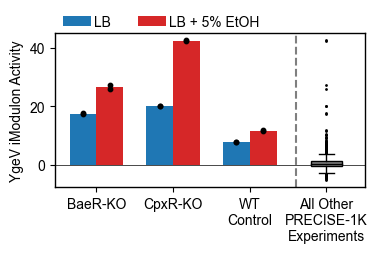

In [215]:
fig, ax1 = plt.subplots(figsize=(4,2))

# bar plot
labels = ['BaeR-KO', 'CpxR-KO', 'WT\nControl', 'All Other\nPRECISE-1K\nExperiments']
LB = ygeV_pivot[ygeV_pivot.index.str.contains('_lb')].YgeV.to_list()+[0]
Ethanol = ygeV_pivot[ygeV_pivot.index.str.contains('_etoh')].YgeV.to_list()+[0]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

rects1 = ax1.bar(x - width/2, LB, width, label='LB', lw=0, color='tab:blue')
rects2 = ax1.bar(x + width/2, Ethanol, width, label='LB + 5% EtOH', lw=0, color = 'tab:red')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax1.set_ylabel('YgeV iModulon Activity', fontsize=10)
ax1.set_xlabel('Experiment', fontsize=10)
ax1.set_xticks(x)
ax1.set_xticklabels(labels)
ax1.legend(bbox_to_anchor=(0.7,1.2), frameon=False, ncol=2, 
           columnspacing=2, handletextpad=.2)

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        
autolabel(rects1)
autolabel(rects2)

#scatterpoints
scatter_x = []
for i in x[:-1]:
    scatter_x.extend([i-width/2]*2+ [i+width/2]*2)
ax1.scatter(scatter_x, ygeV_A_TCS_df.YgeV, color="k", zorder=2, s=10)


# boxplot
ax1.axvline(2.6, color='tab:gray', ls='--')
ax1.axhline(0, color='k', lw=0.5)
flierprops = dict(marker='o', markersize=1,
                  linestyle='none', markeredgecolor='k')
ax1.boxplot(ygeV_A_df.T[~ygeV_A_df.T.index.isin(conditions)].YgeV.to_list(), 
            positions=[3], flierprops=flierprops, widths=[.4], 
            patch_artist=True, boxprops= dict(facecolor='tab:gray'),
            medianprops=dict(color='k'))

ax1.set_xticks(x)
ax1.set_xticklabels(labels)
ax1.set_xlabel('')

# more formatting
ax1.spines['top'].set_color('0'); ax1.spines['bottom'].set_color('0')
ax1.spines['left'].set_color('0'); ax1.spines['right'].set_color('0')
ax1.spines['top'].set_linewidth(1); ax1.spines['bottom'].set_linewidth(1)
ax1.spines['left'].set_linewidth(1); ax1.spines['right'].set_linewidth(1)

plt.savefig(os.path.join(FIG_PATH, 'ygev_activity.svg'), dpi=400, bbox_inches='tight')
plt.savefig(os.path.join(FIG_PATH, 'ygev_activity.png'), dpi=400, bbox_inches='tight')

# YmfT

## Gene Weights

In [9]:
p1k.view_imodulon('YmfT')

,gene_weight,gene_name,synonyms,gene_product,COG,regulator,uniprot,start,end,strand,...,y_ome,k_eff,schmidt_prot_med,heckmann_prot_med,proteomics,p1k,p1k_ctrl_log_tpm,p1k_median_log_tpm,p1k_mad_log_tpm,in_iM
b0683,-0.142710,fur,fur,DNA-binding transcriptional dual regulator Fur,Transcription,"RpoD,Crp,OxyR,SoxS,Fur,ryhB",P0A9A9,710200,710646,-,...,False,True,5712.5,1758.0,True,True,9.893922,9.756415,0.359287,True
b0958,0.092609,sulA,sulA;sfiA,cell division inhibitor SulA,"Cell cycle control, cell division, chromosome ...","RpoD,LexA,RcdA,Lrp",P0AFZ5,1020410,1020919,-,...,False,False,NaN,NaN,False,True,5.780992,6.250542,0.621807,True
b1140,0.138831,intE,intE;ycfI,e14 prophage%3B putative integrase,"Replication, recombination and repair",NaN,P75969,1199679,1200806,-,...,True,False,NaN,NaN,False,True,2.774582,3.054222,0.628318,True
b1141,0.181504,xisE,xisE;vxis;ymfG,e14 prophage%3B putative excisionase,Function unknown,NaN,P75970,1200787,1201032,-,...,True,False,NaN,NaN,False,True,2.783819,3.044004,0.915766,True
b1142,0.212956,ymfH,NaN,e14 prophage%3B protein YmfH,No COG annotation,NaN,UPI000013A215,1201069,1201380,-,...,True,False,NaN,NaN,False,True,1.516312,1.244883,1.179501,True
b1144,0.289413,ymfJ,ymfJ,e14 prophage%3B protein YmfJ,No COG annotation,ppGpp,P75973,1201776,1202084,-,...,True,False,NaN,NaN,False,True,3.689646,3.225761,0.922226,True
b1146,0.411590,ymfT,croE;ymfT,e14 prophage%3B putative DNA-binding transcrip...,Transcription,NaN,P75975,1203024,1203224,+,...,True,False,NaN,NaN,False,True,1.557989,1.967358,1.096127,True
b1147,0.233123,ymfL,ymfL,e14 prophage%3B uncharacterized protein YmfL,No COG annotation,NaN,P75976,1203268,1203825,+,...,True,False,NaN,NaN,False,True,1.029887,1.428234,0.720165,True
b1148,0.285682,ymfM,ymfM,e14 prophage%3B protein YmfM,No COG annotation,NaN,P75977,1203822,1204160,+,...,True,False,NaN,NaN,False,True,1.646156,1.744685,0.865403,True
b1149,0.109679,ymfN,NaN,e14 prophage%3B chimeric replication protein/p...,Transcription,NaN,UPI000013B9B8,1204170,1205537,+,...,True,False,NaN,NaN,False,True,0.315434,0.223021,0.330650,True


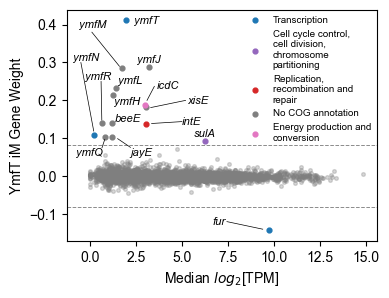

In [211]:
_, ax = plt.subplots(figsize=(4, 3))

colors = []
gene_weights = []

cog_to_col = {
    'Cell cycle control, cell division, chromosome partitioning': 'tab:purple',
    'Energy production and conversion': 'tab:pink',
    'Function unknown': 'tab:gray',
    'No COG annotation': 'tab:gray',
    'Replication, recombination and repair': 'tab:red',
    'Transcription': 'tab:blue'
}

im_m_bin = p1k.M_binarized['YmfT']

genes_in = list(im_m_bin[im_m_bin == 1].index)
genes_out = list(im_m_bin[im_m_bin == 0].index)

ax.scatter(p1k_log_tpm.median(axis=1).loc[genes_out], p1k.M['YmfT'].loc[genes_out], c='tab:gray', alpha=0.3, s=7)

def split_cog(cog):
    split_cog = ''
    line_len = 0
    for word in cog.split():
        if len(split_cog) == 0:
            split_cog = word
            line_len = len(word)
        elif line_len + len(word) < 20:
            split_cog = f'{split_cog} {word}'
            line_len += len(word)
        else:
            split_cog = f'{split_cog}\n{word}'
            line_len = len(word)
            
    return split_cog

xy_gene = []
cogs_seen = []
for gene_in in genes_in:
    x, y = p1k_log_tpm.median(axis=1).loc[gene_in], p1k.M['YmfT'].loc[gene_in]
    cog = p1k.gene_table.loc[gene_in, 'COG'].replace('Function unknown', 'No COG annotation')
    if cog in cogs_seen:
        ax.scatter(x, y, c=cog_to_col[cog], s=12)
    else:
        ax.scatter(x, y, c=cog_to_col[cog], s=12, label=split_cog(cog))
        cogs_seen.append(cog)
    xy_gene.append(((x, y), p1k.gene_table.loc[gene_in, 'gene_name']))
    
ax.legend(fontsize=7, framealpha=0, bbox_to_anchor=(1.01, 0.7), loc='right')
    
ax.set_xlabel('Median $log_{2}$[TPM]', fontsize=10)
ax.set_ylabel('YmfT iM Gene Weight', fontsize=10)

ax.axhline(p1k.thresholds['YmfT'], linestyle='--', color='tab:gray', linewidth=0.7, alpha=0.9, zorder=-1)
ax.axhline(-p1k.thresholds['YmfT'], linestyle='--', color='tab:gray', linewidth=0.7, alpha=0.9, zorder=-1)
    
# manual labeling is better honestly
ax.plot((7.45, 9.4), (-0.12, -0.14), linewidth=0.5, color='k')
ax.text(7.4, -0.12, 'fur', ha='right', va='center', fontsize=8, fontstyle='italic', font='arial')

ax.text(6.25, 0.1, 'sulA', ha='center', va='bottom', fontsize=8, fontstyle='italic', font='arial')

ax.text(2.4, 0.411, 'ymfT', ha='left', va='center', fontsize=8, fontstyle='italic', font='arial')

ax.plot((1.5, 2.2), (0.099, 0.076), linewidth=0.5, color='k')
ax.text(2.2, 0.075, 'jayE', ha='left', va='top', fontsize=8, fontstyle='italic', font='arial')

ax.plot((0.65, 0.8), (0.075, 0.097), linewidth=0.5, color='k')
ax.text(0.7, 0.075, 'ymfQ', ha='right', va='top', fontsize=8, fontstyle='italic', font='arial')

ax.plot((-0.5, 0.2), (0.3, 0.119), linewidth=0.5, color='k')
ax.text(0.5, 0.3, 'ymfN', ha='right', va='bottom', fontsize=8, fontstyle='italic', font='arial')

ax.text(1.35, 0.1397, 'beeE', ha='left', va='bottom', fontsize=8, fontstyle='italic', font='arial')

ax.plot((3.35, 5), (0.139, 0.144), linewidth=0.5, color='k')
ax.text(5, 0.144, 'intE', ha='left', va='center', fontsize=8, fontstyle='italic', font='arial')

ax.plot((0.6, 0.64), (0.25, 0.148), linewidth=0.5, color='k')
ax.text(1.14, 0.25, 'ymfR', ha='right', va='bottom', fontsize=8, fontstyle='italic', font='arial')

ax.plot((0.1, 1.6), (0.38, 0.29), linewidth=0.5, color='k')
ax.text(0.9, 0.4, 'ymfM', ha='right', va='center', fontsize=8, fontstyle='italic', font='arial')

ax.text(3.225, 0.295, 'ymfJ', ha='center', va='bottom', fontsize=8, fontstyle='italic', font='arial')

ax.plot((3.3, 5.2), (0.181, 0.2), linewidth=0.5, color='k')
ax.text(5.3, 0.2, 'xisE', ha='left', va='center', fontsize=8, fontstyle='italic', font='arial')

ax.plot((3.1, 3.5), (0.2, 0.237), linewidth=0.5, color='k')
ax.text(3.6, 0.24, 'icdC', ha='left', va='center', fontsize=8, fontstyle='italic', font='arial')

ax.text(1.3, 0.21, 'ymfH', ha='left', va='top', fontsize=8, fontstyle='italic', font='arial')

ax.text(1.5, 0.24, 'ymfL', ha='left', va='bottom', fontsize=8, fontstyle='italic', font='arial')

plt.savefig(os.path.join(FIG_PATH, 'ymft_gene_weights.svg'), dpi=400, bbox_inches='tight')
plt.savefig(os.path.join(FIG_PATH, 'ymft_gene_weights.png'), dpi=400, bbox_inches='tight')

## Activity w/Fur KO

In [212]:
ymfT_A_df = p1k.A[p1k.A.index == 'YmfT']
ymfT_A_df.columns = p1k.sample_table.full_name

conditions = ['fur:wt_fe','fur:delfur_fe2','oxyR:wt_glc','oxyR:wt_h2o2']

ymfT_A_cond_df = ymfT_A_df[conditions].T
ymfT_pivot = ymfT_A_cond_df.reset_index().pivot_table(columns=["full_name"])[conditions].T

ymfT_pivot

,YmfT
full_name,
fur:wt_fe,1.732225
fur:delfur_fe2,11.015707
oxyR:wt_glc,0.970354
oxyR:wt_h2o2,12.131115


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


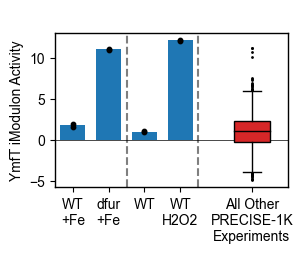

In [216]:
fig, ax1 = plt.subplots(figsize=(3,2))

# bar plot
labels = ['WT\n+Fe', 'dfur\n+Fe', 'WT','WT\nH2O2']

x = np.arange(len(labels))  # the label locations
width = 0.7  # the width of the bars

rects1 = ax1.bar(x, ymfT_pivot['YmfT'].values, width, label=None, lw=0, color='tab:blue')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax1.set_ylabel('YmfT iModulon Activity', fontsize=10)
ax1.set_xlabel('Experiment', fontsize=10)
ax1.set_xticks(x)
ax1.set_xticklabels(labels)
ax1.legend(bbox_to_anchor=(0.7,1.2), frameon=False, ncol=2, 
           columnspacing=2, handletextpad=.2)

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        
autolabel(rects1)
autolabel(rects2)

#scatterpoints
scatter_x = []
for i in x:
    scatter_x.extend([i]*2)
ax1.scatter(scatter_x, ymfT_A_cond_df.YmfT, color="k", zorder=2, s=10)


# boxplot
ax1.axvline(3.5, color='tab:gray', ls='--')
ax1.axvline(1.5, color='tab:gray', ls='--')
ax1.axhline(0, color='k', lw=0.5)
flierprops = dict(marker='o', markersize=1,
                  linestyle='none', markeredgecolor='k')

ax1.boxplot(ymfT_A_df.T[~ymfT_A_df.T.index.isin(conditions)].YmfT.to_list(), 
            positions=[5], flierprops=flierprops, widths=[1], 
            patch_artist=True, boxprops= dict(facecolor='tab:red'),
            medianprops=dict(color='k'))

ax1.set_xticks(list(range(4))+[5])
ax1.set_xticklabels(labels+['All Other\nPRECISE-1K\nExperiments'])
ax1.set_xlim([-.5,6])

# more formatting
ax1.spines['top'].set_color('0'); ax1.spines['bottom'].set_color('0')
ax1.spines['left'].set_color('0'); ax1.spines['right'].set_color('0')
ax1.spines['top'].set_linewidth(1); ax1.spines['bottom'].set_linewidth(1)
ax1.spines['left'].set_linewidth(1); ax1.spines['right'].set_linewidth(1)

ax1.set_xlabel('')

plt.savefig(os.path.join(FIG_PATH, 'ymft_activity.svg'), dpi=400, bbox_inches='tight')
plt.savefig(os.path.join(FIG_PATH, 'ymft_activity.png'), dpi=400, bbox_inches='tight')